***Alternative time series project***

In [104]:
# instalar carpeta de requerimientos:
%pip install -r ../requirements.txt


[notice] A new release of pip available: 22.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [177]:
# instalar los paquetes:
! pip install -q sklearn
! pip install -q seaborn
! pip install -q cufflinks
! pip install -q statsmodels
! pip install git+https://github.com/RJT1990/pyflux


  Cloning https://github.com/RJT1990/pyflux to /tmp/pip-req-build-120kigv8
  Running command git clone --filter=blob:none --quiet https://github.com/RJT1990/pyflux /tmp/pip-req-build-120kigv8
  Resolved https://github.com/RJT1990/pyflux to commit 297f2afc2095acd97c12e827dd500e8ea5da0c0f
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [52 lines of output]
      /tmp/pip-req-build-120kigv8/setup.py:62: DeprecationWarning:
      
        `numpy.distutils` is deprecated since NumPy 1.23.0, as a result
        of the deprecation of `distutils` itself. It will be removed for
        Python >= 3.12. For older Python versions it will remain present.
        It is recommended to use `setuptools < 60.0` for those Python versions.
        For more details, see:
          https://numpy.org/devdocs/reference/distutils_status_migration.html
      
      
        from numpy.distutils.core 

***Step 1:***


In [179]:
# cargar las librerias: 
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt #visualization
import statsmodels.api as sm
import datetime
%matplotlib inline


***Step 2:***

In [180]:
# cargamos los datos: 
URL = "https://raw.githubusercontent.com/oreilly-mlsec/book-resources/master/chapter3/datasets/cpu-utilization/cpu-train-a.csv"
URL_1="https://raw.githubusercontent.com/oreilly-mlsec/book-resources/master/chapter3/datasets/cpu-utilization/cpu-train-b.csv"
URL_2= "https://raw.githubusercontent.com/oreilly-mlsec/book-resources/master/chapter3/datasets/cpu-utilization/cpu-test-a.csv"
URL_3= "https://raw.githubusercontent.com/oreilly-mlsec/book-resources/master/chapter3/datasets/cpu-utilization/cpu-test-b.csv"

cpu_train_a= pd.read_csv(URL,parse_dates=[0], index_col=0, infer_datetime_format=True)
cpu_train_b=pd.read_csv(URL_1,parse_dates=[0], infer_datetime_format=True)
cpu_test_a=pd.read_csv(URL_2,parse_dates=[0], infer_datetime_format=True)
cpu_test_b=pd.read_csv(URL_3,parse_dates=[0], infer_datetime_format=True)

In [181]:
# mirando las últimas fechas:
cpu_train_a.tail()

,cpu
datetime,
2017-01-28 01:37:00,2.41
2017-01-28 01:38:00,2.16
2017-01-28 01:39:00,1.93
2017-01-28 01:40:00,2.14
2017-01-28 01:41:00,1.96


In [182]:
# mirando los primeros datos:
cpu_train_b.head(5)

,datetime,cpu
0,2017-01-27 18:42:00,1.14
1,2017-01-27 18:43:00,1.10
2,2017-01-27 18:44:00,1.09
3,2017-01-27 18:45:00,1.08
4,2017-01-27 18:46:00,1.08


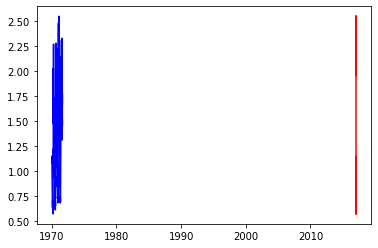

In [183]:
# ver la data 
plt.plot(cpu_train_a['cpu'],'r')
plt.plot(cpu_train_b['cpu'],'b')
# solo utilizo el train a porque es lo mismo que el b

In [184]:
cpu_test_a.head(5)

,datetime,cpu
0,2017-01-28 01:42:00,2.19
1,2017-01-28 01:43:00,1.97
2,2017-01-28 01:44:00,2.15
3,2017-01-28 01:45:00,1.94
4,2017-01-28 01:46:00,1.81


In [185]:
cpu_test_b.head(5)

,datetime,cpu
0,2017-01-28 04:42:00,1.71
1,2017-01-28 04:43:00,1.58
2,2017-01-28 04:44:00,1.86
3,2017-01-28 04:45:00,1.66
4,2017-01-28 04:46:00,1.61


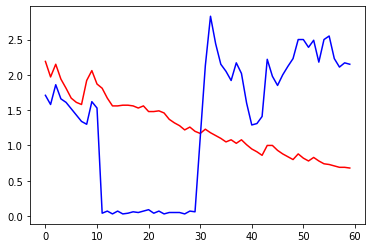

In [186]:
# ver la data 
plt.plot(cpu_test_a['cpu'],'r')
plt.plot(cpu_test_b['cpu'],'b')

***Step 3***

In [187]:
type(cpu_train_a)

pandas.core.frame.DataFrame

In [188]:
cpu_train_a.index = pd.to_datetime(cpu_train_a.index)

In [189]:
import cufflinks as cf
import plotly.offline as py
import matplotlib.pyplot as plt

In [190]:

plt.figure(figsize=(20,8))
plt.plot(cpu_train_a['datetime'], cpu_train_a['cpu'], color='black')
plt.ylabel('CPU %')
plt.title('CPU Utilization')

KeyError: 'datetime'

<Figure size 1440x576 with 0 Axes>

***Step 4***

In [191]:
mod = sm.tsa.arima.ARIMA(cpu_train_a, order=(6, 0, 0))
res = mod.fit()
print(res.summary())

/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency T will be used.

/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency T will be used.

/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency T will be used.



                               SARIMAX Results                                
Dep. Variable:                    cpu   No. Observations:                  420
Model:                 ARIMA(6, 0, 0)   Log Likelihood                 287.879
Date:                Wed, 10 Aug 2022   AIC                           -559.758
Time:                        03:16:25   BIC                           -527.436
Sample:                    01-27-2017   HQIC                          -546.982
                         - 01-28-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3134      0.516      2.545      0.011       0.302       2.325
ar.L1          0.9391      0.036     26.233      0.000       0.869       1.009
ar.L2         -0.0976      0.047     -2.074      0.0

In [193]:
start = cpu_train_a.index[-1]+ datetime.timedelta(minutes=-10)
print(start)

2017-01-28 01:31:00


In [194]:
end = cpu_train_a.index[-1]+ datetime.timedelta(minutes=180)
print(end)

2017-01-28 04:41:00


<AxesSubplot:>

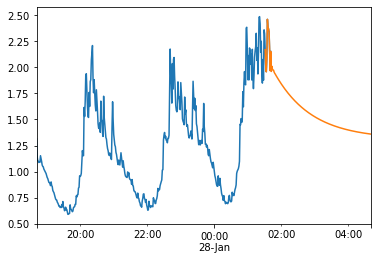

In [195]:
res.predict().plot()
res.predict(start,end).plot()

***Step 5:***

In [103]:
# evaluate performance:

***Step 6***

In [23]:
# Ejecute la predicción real utilizando los 100 puntos de datos observados más recientes seguidos de los 60 puntos predichos.

***Step 7***

In [ ]:
#Realicemos la misma detección de anomalías en otro segmento del conjunto de datos de uso de la CPU capturado en un #momento diferente mediante el uso de cpu-train-b